<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ana Luisa Espinoza López.

**Fecha:** 10 de octubre del 2023.

**Expediente** : 734753.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/aluisaespinoza1/Tarea_6_Clase13

# Tarea 6: Clase 13/14

## Enunciado de tarea 
Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}e^{x^2}\text{d}x\approx 1.46265$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado (igualmente espaciado), recibiendo como  parámetros de entrada la cantidad de estratos, los valores a y b en los cuales se deben de generar los números aletorios y retornando las variables estratíficadas correspondientes.
2. Cree una función que realice el método de muestreo estratíficado (con intervalos no igualmente espaciados), recibiendo como parámetro la cantidad de términos que se tienen que generar en cada estrato y regrese las variables aleatorias estratificadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente tabla:

| Cantidad de términos | Montecarlo crudo | Error 1% | Montecarlo estratíficado 1 | Error 2 % | Montecarlo estratíficado 2 | Error 3 % |
|:--------------------:|:----------------:|:--------:|:--------------------------:|:---------:|:--------------------------:|:---------:|
|          10          |                  |          |                            |           |                            |           |
|          100         |                  |          |                            |           |                            |           |
|         1000         |                  |          |                            |           |                            |           |
|         10000        |                  |          |                            |           |                            |           |
|        100000        |                  |          |                            |           |                            |           |
|        1000000       |                  |          |                            |           |                            |           |

**Esta tarea incluye el ejercicio dejado en la clase anterior**
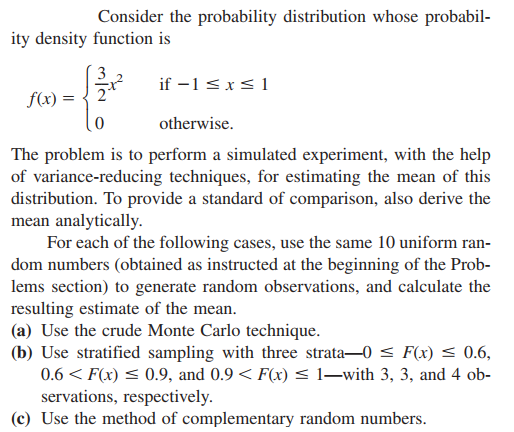
Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

### Ejercicio 1: 
Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}e^{x^2}\text{d}x\approx 1.46265$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado (igualmente espaciado), recibiendo como  parámetros de entrada la cantidad de estratos, los valores a y b en los cuales se deben de generar los números aletorios y retornando las variables estratíficadas correspondientes.
2. Cree una función que realice el método de muestreo estratíficado (con intervalos no igualmente espaciados), recibiendo como parámetro la cantidad de términos que se tienen que generar en cada estrato y regrese las variables aleatorias estratificadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente tabla:

| Cantidad de términos | Montecarlo crudo | Error 1% | Montecarlo estratíficado 1 | Error 2 % | Montecarlo estratíficado 2 | Error 3 % |
|:--------------------:|:----------------:|:--------:|:--------------------------:|:---------:|:--------------------------:|:---------:|
|          10          |                  |          |                            |           |                            |           |
|          100         |                  |          |                            |           |                            |           |
|         1000         |                  |          |                            |           |                            |           |
|         10000        |                  |          |                            |           |                            |           |
|        100000        |                  |          |                            |           |                            |           |
|        1000000       |                  |          |                            |           |                            |           |

Código de solución estudiante 1

In [1]:
import numpy as np
import scipy.stats as st     # Librería estadística
import pandas as pd


In [8]:
def estra_igualmente_espaciado(a, b, B):
    Ui = np.random.uniform(a, b, B)
    Bi = np.arange(0, B)
    u_estra = (Ui + Bi) / B
    
    return u_estra

def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

In [11]:
def estra_esp_desiguales(N:'número de muestras',L:'lista longitud de estratos',
                         t:'porcentaje de las muestras por estrato', fi:'función inversa'
                         ):
    l = np.array(L)
    ni = [int(t[0] * N),int(t[1] * N),int(t[2] * N)]
    
    r1 = np.random.uniform(0, l[0], ni[0])
    r2 = np.random.uniform(l[0], l[0]+l[1], ni[1])
    r3 = np.random.uniform(l[0]+l[1], 1, ni[2])
    
    r = [r1, r2, r3]
    
    w = [(ni[i]/N)/l[i] for i in range(len(l))]
    
    muestras = [fi(r[i])/w[i] for i in range(len(l))]
    y = np.array(muestras)
    
    return np.concatenate(y)


In [5]:
# montecarlo crudo
N = np.logspace(1,6,6,dtype=int)
u = list(map(lambda N:np.random.rand(N),N))
I_m = list(map(lambda Y:int_montecarlo(lambda x:np.exp(x**2),0,1,Y),u))

In [6]:
# estratificado 1: espacios iguales
estra_1 = [estra_igualmente_espaciado(0,1,n) for n in N]
I_m_rv = list(map(lambda Y:int_montecarlo(lambda x:np.exp(x**2),0,1,Y),estra_1))

In [29]:
# estratificado 2: espacios desiguales
N = np.logspace(1,6,6,dtype=int)
t = [0.3, 0.4, 0.3]
fi = lambda x:np.sqrt((np.log(x)))
l = [0.2,0.6,0.2]

estra_2 = [estra_esp_desiguales(n,l,t,fi) for n in N]
I_m_e2 = list(map(lambda Y:int_montecarlo(lambda x:np.exp(x**2),0,1,Y),estra_2))


C:\Users\analo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


In [30]:
I = 1.46265

tabla = pd.DataFrame(columns = ['Montecarlo crudo','Error 1 %','Montecarlo Estratificado 1', 'Error 2 %',\
                                'Montecarlo Estratificado 2', 'Error 3 %'], index = N)
tabla.index.name = 'Cantidad de Términos'
tabla.loc[N,"Montecarlo crudo"] = I_m
tabla.loc[N,"Error 1 %"] = np.abs(tabla.loc[N,"Montecarlo crudo"]-I)*100/I
tabla.loc[N,"Montecarlo Estratificado 1"] = I_m_rv
tabla.loc[N,"Error 2 %"] = np.abs(tabla.loc[N,"Montecarlo Estratificado 1"]-I)*100/I
tabla.loc[N,"Montecarlo Estratificado 2"] = I_m_e2
tabla.loc[N,"Error 3 %"] = np.abs(tabla.loc[N,"Montecarlo Estratificado 2"]-I)*100/I
tabla

,Montecarlo crudo,Error 1 %,Montecarlo Estratificado 1,Error 2 %,Montecarlo Estratificado 2,Error 3 %
Cantidad de Términos,,,,,,
10,1.983538,35.612595,1.459825,0.193127,NaN,NaN
100,1.442489,1.378408,1.463297,0.044214,NaN,NaN
1000,1.456678,0.408305,1.462636,0.000946,NaN,NaN
10000,1.461531,0.076487,1.462652,0.000148,NaN,NaN
100000,1.462899,0.017011,1.462652,0.000119,NaN,NaN
1000000,1.4627,0.003435,1.462652,0.000119,NaN,NaN


Se tiene la función $ f(x) = e^{x^2} $, para calcular las muestras estratificadas con espacios desiguales se requiere de la función inversa que en este caso es:
$$ f^{-1}(x) = \sqrt{ln(x)} $$

Se puede observar que el método de muestras estratificadas con espacios desiguales no funcionó en este caso dado que la función inversa arroja valores inválidos dado que el logaritmo natural de números entre 0 y 1 (que son los límites de la integral) es negativo, por lo tanto al sacar su raíz regresa valores imaginarios. 

### Ejercicio 2:
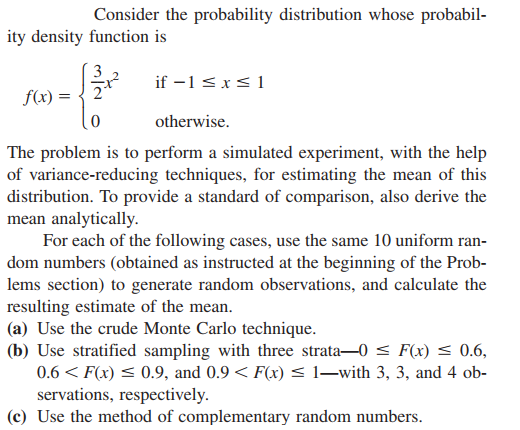
Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

Código de solución estudiante 1

La distribución de probabilidad acumulada es la siguiente:

$$F(x) = \int_{-1}^{x} \frac{3}{2} s^2ds = \frac{x^3}{2} - \frac{(-1)^3}{2} = \frac{x^3}{2} + \frac{1}{2}$$

Función Inversa de $F(x)$:

$$ U =  \frac{x^3}{2} + \frac{1}{2}$$
$$2(U - \frac{1}{2}) = x^3$$ 
$$ x = \sqrt[3]{2U - 1} $$

In [2]:
f = lambda x: (3/2) * x**2 if -1 <= x <= 1 else 0
F_inv = lambda u: np.cbrt(2*u - 1)

In [3]:
N = 10
estratos = [2, 4, 6, 10]

In [4]:
# Montecarlo crudo
ui = np.random.rand(N)
m_rand = F_inv(ui).mean()
print('Media de observaciones aleatorias = ', m_rand)

Media de observaciones aleatorias =  -0.20050791851470234


In [5]:
#Método estratificado no igualmente espaciado

n =[3, 3, 4]

r1 = np.random.uniform(0, 0.6, n[0])
r2 = np.random.uniform(0.6, 0.9, n[1])
r3 = np.random.uniform(0.9, 1, n[2])

l = [0.6, 0.3, 0.1]

r = [r1, r2, r3]
w = [(n[i]/N)/l[i] for i in range(len(n))]

xi = [F_inv(ri)/wi for ri, wi in zip(r,w)]

media = np.concatenate(xi).mean()
print(f'Media método estratificado no igualmente espaciado = {media}')

Media método estratificado no igualmente espaciado = -0.07821664793778008


In [6]:
#Método Valores complementarios 

u = np.random.rand(int(N/2))
u_c = 1 - u

U = np.concatenate([u, u_c])

m_com = F_inv(U).mean()
print(f'Media método estratificado no igualmente espaciado = {m_com}')

Media método estratificado no igualmente espaciado = -1.1102230246251566e-17


In [19]:
# Método estratificado

estratos = [2, 4, 6, 10]
estra = [estra_igualmente_espaciado(-1,1,n) for n in estratos]
xi = [np.mean(F_inv(estra[j])) for j in range(len(estratos))]

print(f'La media utilizando 2 estratos es: {xi[0]}')
print(f'La media utilizando 4 estratos es: {xi[1]}')
print(f'La media utilizando 6 estratos es: {xi[2]}')
print(f'La media utilizando 10 estratos es: {xi[3]}')

La media utilizando 2 estratos es: -1.0674664041157698
La media utilizando 4 estratos es: -0.5061845342041393
La media utilizando 6 estratos es: 0.05422692298239318
La media utilizando 10 estratos es: -0.08348712990457745


**Conclusión:**

Los 4 métodos dan resultados similares, comparando todos los resultados se podría estimar que la media tiende a cero, en este caso se utilizó un número muy pequeño de estratos por lo que se puede inferir que por eso son tan distintos los resultados en cada método. Se podría analizar con mayor claridad la media de la distribución de probabilidad si se usara un mayor número de muestras